In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import joblib
import librosa
from librosa.display import specshow
import os
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
def tomelscale(x):
    return 2595*np.log10(1+x/700)
def show_spectrogram(S_dB, sample, recording_id, showlabel=True):
    fig, ax = plt.subplots(figsize=(15,3))
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax, cmap='magma', sr=48000)
    ax.set(title=f'Mel-frequency spectrogram of {recording_id}')
    sid, fmin, fmax, tmin, tmax, istp = (
            sample["species_id"], sample["f_min"], sample["f_max"], sample["t_min"], sample["t_max"], sample["is_tp"])
    fmin, fmax = tomelscale(fmin), tomelscale(fmax)
    ec = '#00ff00' if istp == 1 else '#0000ff'
    ax.add_patch(
        patches.Rectangle(xy=(tmin, fmin), width=tmax-tmin, height=fmax-fmin, ec=ec, fill=False)
    )
    if showlabel:
        ax.text(tmin, fmax, 
        f"{sid} {'tp' if istp == 1 else 'fp'}",
        horizontalalignment='left', verticalalignment='bottom', color=ec, fontsize=16)
    plt.show()

In [3]:
train_tp = pd.read_csv('../../input/kaggle/train_tp.csv', index_col='recording_id')
train_tp['is_tp'] = True
base_path = '../../input/kaggle/train'
fnames = os.listdir(base_path)
fnames = [os.path.join(base_path, fname) for fname in fnames]
train_tp.head()

,species_id,songtype_id,t_min,f_min,t_max,f_max,is_tp
recording_id,,,,,,,
003bec244,14,1,44.5440,2531.250,45.1307,5531.25,True
006ab765f,23,1,39.9615,7235.160,46.0452,11283.40,True
007f87ba2,12,1,39.1360,562.500,42.2720,3281.25,True
0099c367b,17,4,51.4206,1464.260,55.1996,4565.04,True
009b760e6,10,1,50.0854,947.461,52.5293,10852.70,True


==========3==========


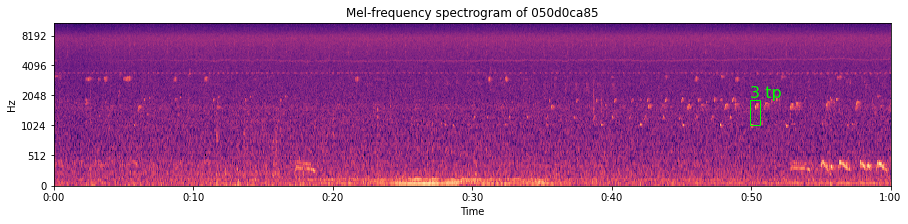

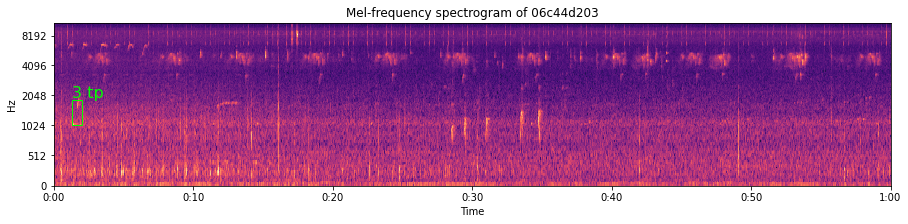

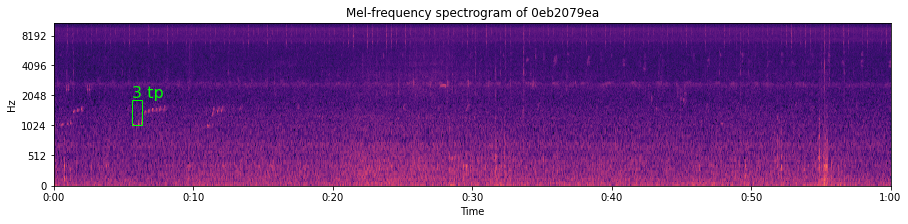

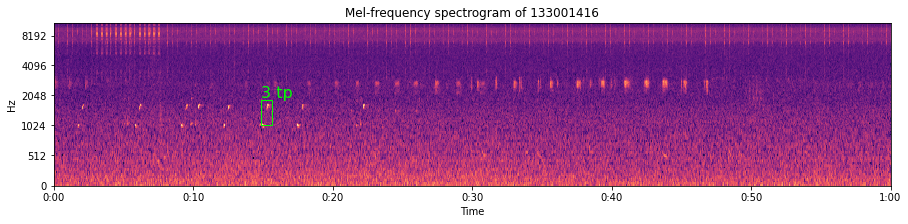

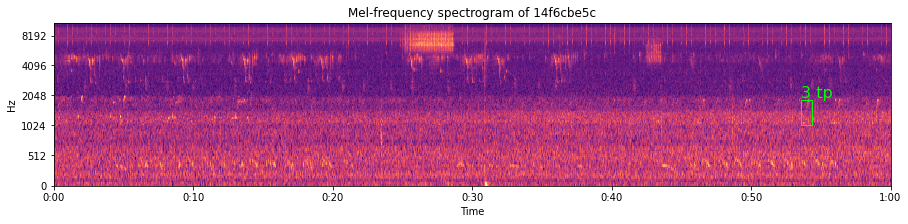

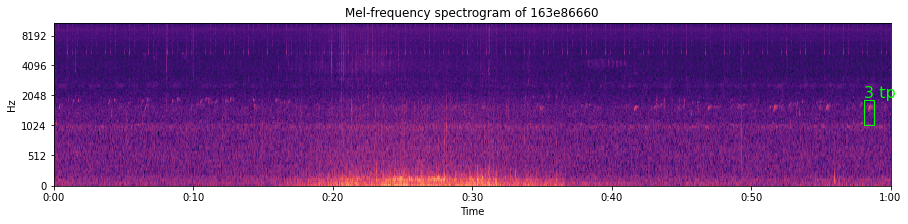

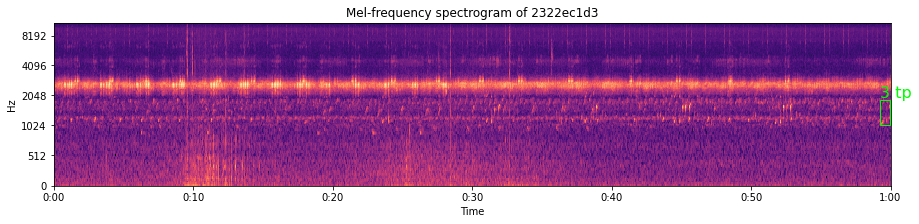

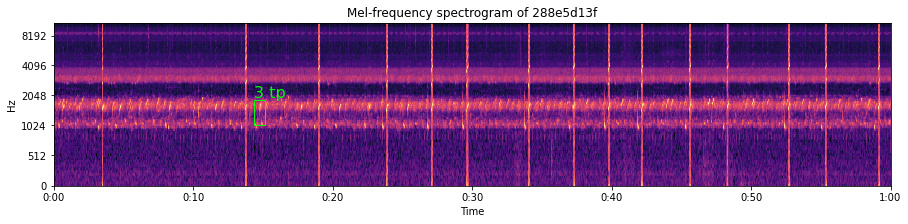

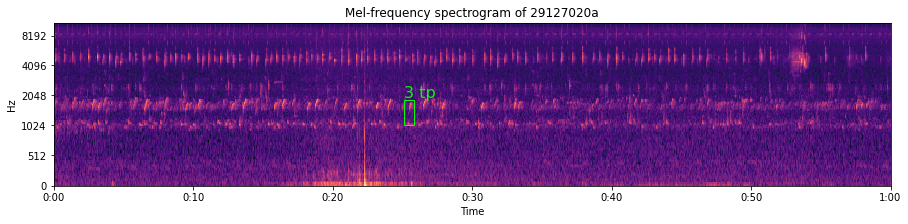

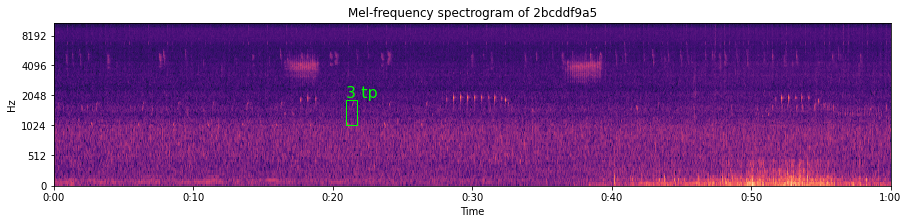

In [4]:
for species in range(3,4):
    print('='*10+str(species)+'='*10)
    cur_tp = train_tp[train_tp['species_id']==species]
    count = 0
    for i, row in cur_tp.iterrows():
        y, sr = librosa.load(os.path.join(base_path, i+'.flac'), sr=None)
        melspec = librosa.feature.melspectrogram(
            y, sr=sr, n_mels=128
        )
        melspec = librosa.power_to_db(melspec).astype(np.float32)
        show_spectrogram(melspec, row, i)
#         display(Audio(y, rate=sr))
        count += 1
        if count == 10:
            break